Pose Tracking from mp4 with AlphaPose
==========================================================

This code extracts images from video then uses pre-trained Alpha Pose models to capture tracking data.


1 Load Packages
==========================================================

First let's import some necessary libraries:

In [1]:

%matplotlib inline
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_alpha_pose, heatmap_to_coord_alpha_pose
from ipywidgets import interact
import ffmpeg
import ipywidgets as widgets
import numpy as np
import subprocess
import pandas as pd
import cv2 as cv
from PIL import Image


2  Import Video and Cut into Images
-------------------------
Now bring in the video and figure out width and height

In [2]:

#Part A: Import Video

Dunk = ffmpeg.probe('Dunk.mp4')
video_info = next(s for s in Dunk['streams'] if s['codec_type'] == 'video')
width = int(video_info['width'])
height = int(video_info['height'])
num_frames = int(video_info['nb_frames'])
def get_length(input_video):
    result = subprocess.run(['ffprobe', '-v', 'error', '-show_entries', 'format=duration', '-of', 'default=noprint_wrappers=1:nokey=1', input_video], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    return float(result.stdout)
time = get_length('Dunk.mp4')

print('Width: ', width)
print('Height: ',height)
print('Frames: ',num_frames)
print('Time: ',time)

# Part B: Cut Video into Images.

#i = 0.1

#while i < time: 
#    string_in_string = "output{}.jpg".format(i)
#    (
#        ffmpeg
#        .input('Dunk.mp4', ss=i)
#        .filter('scale', width, -1)
#        .output(string_in_string, vframes=1)
#        .run()
#    )
#    i = i + 0.5



Width:  1280
Height:  720
Frames:  203
Time:  6.803


3 Run AlphaPose to get pose estimation data
---------------------

AlphaPose spits out an mxnet.nDArray called pred_coords. I change it into a numpy array and then pandas data frame.<br>
However, that may take up a bunch of processing time I don't need.



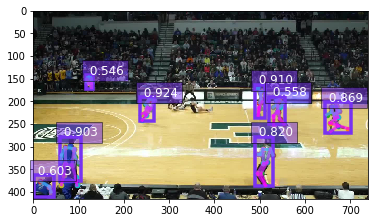

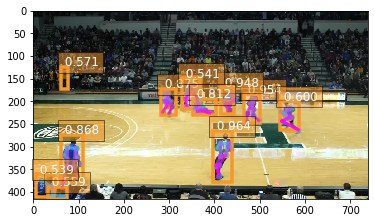

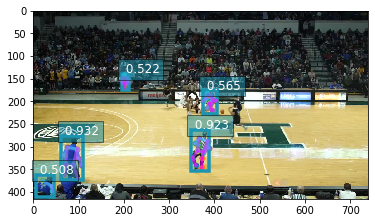

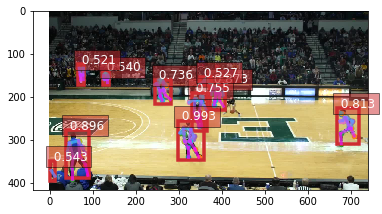

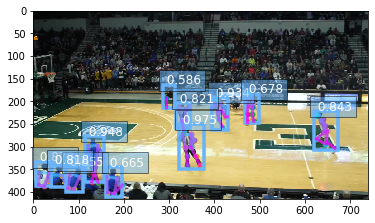

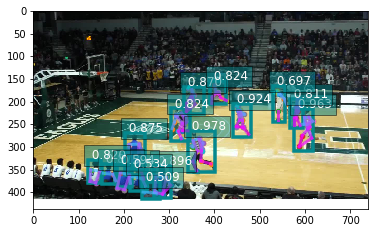

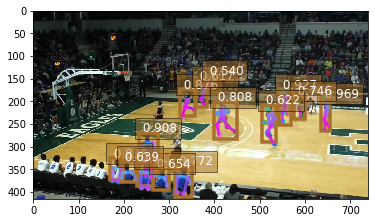

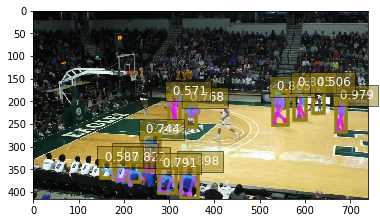

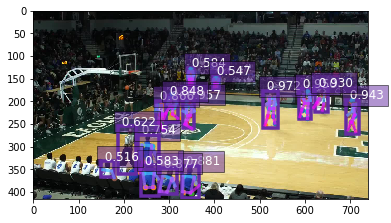

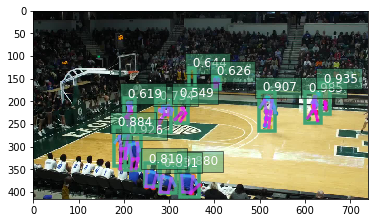

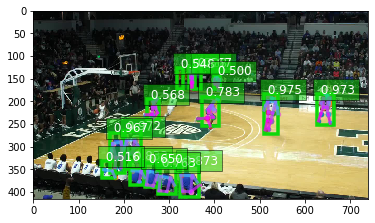

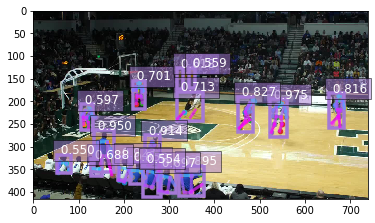

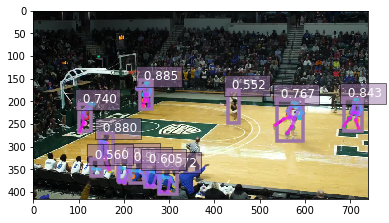

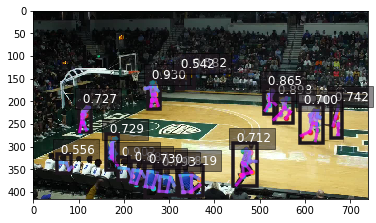

In [3]:


#Part A: Load a Pre-Trained Model

#Get an Alpha Pose model trained with input images of size 256x192 on MS COCO dataset. 
#We pick the one using ResNet-101 V1b as the base model. 
#By specifying``pretrained=True``, it will automatically download the model from the model zoo if necessary.
# For more pretrained models, please refer to: doc:`../../model_zoo/index`.

detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('alpha_pose_resnet101_v1b_coco', pretrained=True)
detector.reset_class(["person"], reuse_weights=['person'])

#PART B: Run the model on each image 
#        Write coordinates to xpose and ypose

xpose = []
ypose = []

i = 0.1

while i < time:
# Read in each image and transform to necessary structure
    im_fname = "output{}.jpg".format(i)
    output = "outputa{}.jpg".format(i)
# Convert image into proper form for AlphaPose
    x, img = data.transforms.presets.yolo.load_test(im_fname)
#    print('Shape of pre-processed image:', x.shape)
    class_IDs, scores, bounding_boxs = detector(x)
    pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)
# Run AlphaPose model
    predicted_heatmap = pose_net(pose_input)
    pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)
# Visualize pose data
    ax = utils.viz.plot_keypoints(img, pred_coords, confidence, class_IDs, bounding_boxs, scores, box_thresh=0.5, keypoint_thresh=0.2)
# Change coordinates to numpy array, transpose into x and y coordinates, and then change into a pandas dataframe
    num_coords = pred_coords.asnumpy()
    x, y = num_coords.T
    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
#    print(x)
#    print(y)
# Select only the coordinates we want (ankle)
    x = x.iloc[15]
    y = y.iloc[15]
#    print(x)
#    print(y)
# You can use this to check which points are what, change s for bigger points
#    plt.scatter(x,y,s=250) 
# Save the figure to a new jpg
#    plt.savefig(output)
    xpose.append(x)
    ypose.append(y)
    i = i + 0.5

#use: x = x.iloc[17]; y = y.iloc[17]; plt.scatter(x,y,s=500) to get overlay points points

#This is the COCO
#iloc[0] is Nose
#iloc[1] is L eye
#iloc[2] is R eye
#iloc[3] is L ear
#iloc[4] is R ear
#iloc[5] is L shoulder
#iloc[6] is R shoulder
#iloc[7] is L elbow
#iloc[8] is R elbow
#iloc[9] is L wrist
#iloc[10] is R wrist
#iloc[11] is L hip
#iloc[12] is R hip
#iloc[13] is L knee
#iloc[14] is R knee
#iloc[15] is L ankle
#iloc[16] is R ankle

#This will flip the axis to plot normally, but will screw it up if you plot it on the original image
#y = 416 - y

#print(x)
#print(type(x))
#print(xtot)
#print(type(xtot))


# Part C: Write the frames back into a movie.
# I can't get this to work on my computer because Windows can't use pattern type glob
# https://github.com/kkroening/ffmpeg-python/issues/180

#try: (
#    ffmpeg
#    .input('*.jpg', pattern_type='glob', framerate=25)
#    .output('movie.mp4')
#    .run(capture_stdout=True, capture_stderr=True)
#)
  

#This will read out the stderr
#except ffmpeg.Error as e:
#    print('stdout:', e.stdout.decode('utf8'))
#    print('stderr:', e.stderr.decode('utf8'))
#    raise e



4 Image Template Matching
---------------------


C:\Users\hubbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


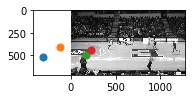

[[[-28   8]]

 [[-28  -8]]]


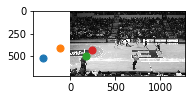

[[[-28   8]]

 [[-28  -8]]]


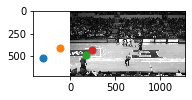

[[[-28   8]]

 [[-28  -8]]]


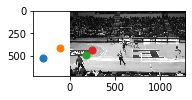

[[[-28   8]]

 [[-28  -8]]]


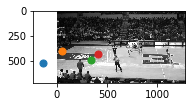

[[[-28   8]]

 [[-28  -8]]]


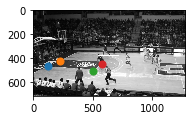

[[[-28   8]]

 [[-28  -8]]]


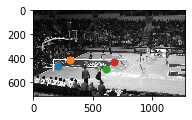

[[[-28   8]]

 [[-28  -8]]]


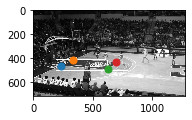

[[[-28   8]]

 [[-28  -8]]]


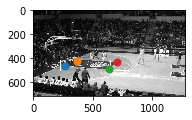

[[[-28   8]]

 [[-28  -8]]]


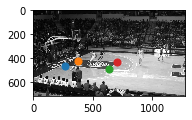

[[[-28   8]]

 [[-28  -8]]]


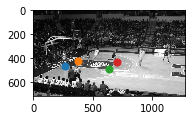

[[[-28   8]]

 [[-28  -8]]]


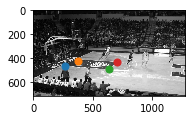

[[[-28   8]]

 [[-28  -8]]]


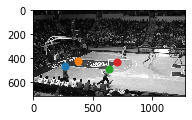

[[[-28   8]]

 [[-28  -8]]]


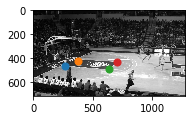

[[[-28   8]]

 [[-28  -8]]]


In [18]:

LArci = cv.imread('LArc2.jpg',0)
LFTi = cv.imread('LFT2.jpg',0)
LBoxi = cv.imread('Lane.jpg',0)
Ei = cv.imread('E2.jpg',0)
method = eval('cv.TM_CCOEFF_NORMED')

i = 0.1

while i < time:
# Read in each image and transform to necessary structure
    im_fname = "output{}.jpg".format(i)
    output = "outputbw{}.jpg".format(i)
    orig = cv.imread(im_fname,0)
#    col = Image.open(im_fname)
#    gray = col.convert('L')
#    bw = gray.point(lambda x: 0 if x < 230 else 255, '1')
#    bw.save(output)
#    img = cv.imread(output,0)
    img = orig

#Left FT Line (LFT)
    template = LFTi
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#    print(max_val)
    LFTval = max_val
    LFT = max_loc
    bottom_right = (LFT[0] + w, LFT[1] + h)
    cv.rectangle(img,LFT, bottom_right, 255, 2)
    plt.subplot(122),plt.imshow(orig,cmap = 'gray')
    
    if(LFTval > 0.65):
        LFTx = LFT[0] + 10
        LFTy = LFT[1] + 78
        RFTx = LFT[0] + 75
        RFTy = LFT[1] + 20
        
#    plt.scatter(top_left[0],top_left[1],s=50) 
#    plt.scatter(LFTx,LFTy,s=50) 
#    plt.scatter(RFTx,RFTy,s=50)
    
#LBox
    template = LBoxi
    w, h = template.shape[::-1]
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#    print(max_val)
    LBoxval = max_val
    LBox = max_loc
    bottom_right = (LBox[0] + w, LBox[1] + h)
    cv.rectangle(img,LBox, bottom_right, 255, 2)
    plt.subplot(122),plt.imshow(orig,cmap = 'gray')
    
    if(LBoxval > 0.443):
        LBx = LBox[0] + 38
        LBy = LBox[1] + 54
        RBx = LBox[0] + 142
        RBy = LBox[1] + 7
        
    else: 
        LBx = LFT[0] + (10-474)
        LBy = LFT[1] + (78+27)
        RBx = LFT[0] + (75-351)
        RBy = LFT[1] + (20-26)
        
    if(LFTval < 0.65):
        LFTx = LBox[0] + (142+277)
        LFTy = LBox[1] + (7+87)
        RFTx = LBox[0] + (142+351)
        RFTy = LBox[1] + (7+26)

#   plt.scatter(top_left[0],top_left[1],s=50) 
    plt.scatter(LBx,LBy,s=50) 
    plt.scatter(RBx,RBy,s=50) 
    plt.scatter(LFTx,LFTy,s=50) 
    plt.scatter(RFTx,RFTy,s=50)
    
# For now I'm going to ignore additional templates

# Next steps for template matching:
# 1. Work on improving accuracy through the b/w process (try different courts)
# 2. Work on the logic for how to calculate which features, etc.
# 3. Incorporate multiple templates - weighted average f the estimated court positions?
# 4. Add the right side of the court
    
#Left Arc (LArc)
#    template = LArci
#    w, h = template.shape[::-1]
#    res = cv.matchTemplate(img,template,method)
#    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#    print(max_val)
#    LArcval = max_val
#    top_left = max_loc
#    bottom_right = (top_left[0] + w, top_left[1] + h)
#    cv.rectangle(img,top_left, bottom_right, 255, 2)
#    plt.subplot(122),plt.imshow(orig,cmap = 'gray') 
#    if(max_val > 0.575):
#        L3x = top_left[0] + 26
#        L3y = top_left[1] + 180
#        R3x = top_left[0] + 403
#        R3y = top_left[1] + 0
#        T3x = top_left[0] + 753
#        T3y = top_left[1] + 107
#    plt.scatter(top_left[0],top_left[1],s=50) 
#    plt.scatter(T3x,T3y,s=50) 
#    plt.scatter(L3x,L3y,s=50) 
#    plt.scatter(R3x,R3y,s=50) 


#E
#    template = Ei
#    w, h = template.shape[::-1]
#    res = cv.matchTemplate(img,template,method)
#    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
#    print(max_val)
#    Eval = max_val
#    top_left = max_loc
#    bottom_right = (top_left[0] + w, top_left[1] + h)
#    cv.rectangle(img,top_left, bottom_right, 255, 2)
#    plt.subplot(122),plt.imshow(orig,cmap = 'gray')
#    if(max_val > 0.4):
#        Cx = top_left[0]+168
#        Cy = top_left[1]+56
#    plt.scatter(top_left[0],top_left[1],s=50) 
#    plt.scatter(Cx,Cy,s=50) 
    plt.show()

    
# Scale the image to known coordinates using an Affine Transform    
    
# Coordinates from Video
    pts1 = np.float32([[RFTx,RFTy],[LFTx,LFTy],[RBx,RBy]])
# Ideal Coordinates
    pts2 = np.float32([[-28,8],[-28,-8],[-47,8]])
    m = cv.getAffineTransform(pts1,pts2)
    src = np.array([ [[RFTx, RFTy]], [[LFTx, LFTy]] ])
    dst = cv.transform(src,m)
    print(dst)

    i = i + 0.5


